<a href="https://colab.research.google.com/github/hussienfci/Data_Science/blob/main/Obesity_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install lazypredict

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.decomposition import PCA

* **In this data we want to know the obsity reasons, and indicators as much as we can**

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Practice/Obesity Classification.csv')
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.30,Normal Weight
1,2,30,Female,160,60,22.50,Normal Weight
2,3,35,Male,180,90,27.30,Overweight
3,4,40,Female,150,50,20.00,Underweight
4,5,45,Male,190,100,31.20,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.90,Underweight
104,107,16,Female,160,10,3.90,Underweight
105,108,21,Male,180,15,5.60,Underweight
106,109,26,Female,150,15,5.60,Underweight


In [ ]:
df.keys()

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [98]:
# Deleting ID because it has no added value
df.drop(['ID'],inplace = True, axis = 1 )
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.30,Normal Weight
1,30,Female,160,60,22.50,Normal Weight
2,35,Male,180,90,27.30,Overweight
3,40,Female,150,50,20.00,Underweight
4,45,Male,190,100,31.20,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.90,Underweight
104,16,Female,160,10,3.90,Underweight
105,21,Male,180,15,5.60,Underweight
106,26,Female,150,15,5.60,Underweight


In [ ]:
df['Gender'].value_counts()

Male      56
Female    52
Name: Gender, dtype: int64

* **What is the majority Gender type the data represent?**
  - The MALE gender is the major gender.

In [ ]:
GenderPie = px.pie(df , names = 'Gender' ,
                  # values = 'BMI'
                   )
GenderPie.show()

* **What is the percentage of each unique value in the label column?**
  - We can conclude that 43.5% (the largest percentage) of people need nutrition plan that help them gain weight

In [ ]:
labelPie = px.pie(df ,
                  labels='Label' ,
                  values=df['Label'].value_counts() ,
                  names=df['Label'].unique(),
                  title='Percentage of the weights label')
labelPie.show()

* **We need to know the distribution of the Body Mass Index column**
  - Most people BMI around 25 which indicates that most of people are overweight.

(<Axes: xlabel='BMI', ylabel='Count'>, 20.54907407407407)

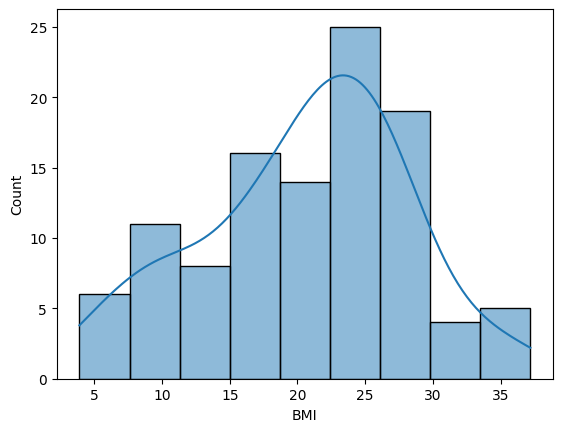

In [ ]:
BMI_Distfig = sns.histplot(data= df , x = 'BMI' ,
                          kde = True
                          )
BMI_Distfig , df['BMI'].mean()

* What is the distribution of age the data represent?
  - The mean of the ages is 46-47 year.
  - Large number of data represent middle adulthood, teenager.
  - This is a red indicator, because most people the data represent are too young to be at risk due to obesity.

(<seaborn.axisgrid.FacetGrid at 0x7ab0f63dd210>, 46.55555555555556)

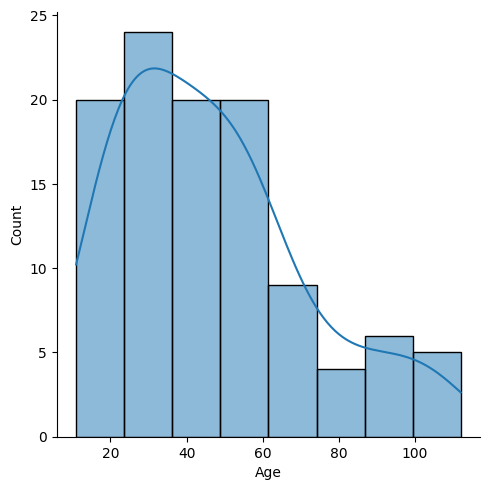

In [ ]:
# What is the average value of the age
ageDist = sns.displot(df , x = 'Age' , kde = True )
ageDist , df['Age'].mean()

* **What is the distribution of the weight column?**

  - *As we see in the figure that the distribtion say that average of the weight column equals to 60 KG.*
  - Large number of people are overweight (80-120 KG)
  - Large number of people are underweight (20-50 KG)

(<seaborn.axisgrid.FacetGrid at 0x7ab0bdd6e710>, 59.49074074074074)

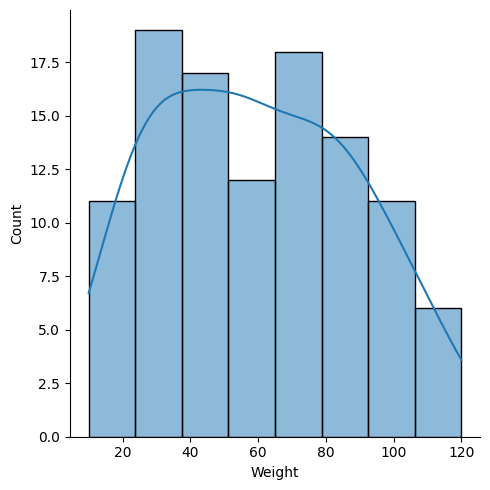

In [ ]:
weightDist = sns.displot(df , x= 'Weight', kde = True)
weightDist , df['Weight'].mean()

(<seaborn.axisgrid.FacetGrid at 0x7e93ce005a20>, 166.57407407407408)

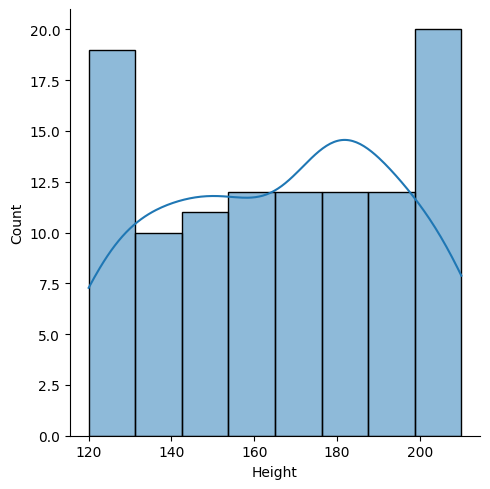

In [ ]:
weightDist = sns.displot(df , x= 'Height', kde = True)
weightDist , df['Height'].mean()

In [99]:
df['Gender'] = df['Gender'].map(lambda x: 0 if x=='Female' else 1)
df['Gender']

0      1
1      0
2      1
3      0
4      1
      ..
103    1
104    0
105    1
106    0
107    1
Name: Gender, Length: 108, dtype: int64

# **ML Part**

In [100]:
X , y = df.drop('Label' , axis = 1 ) , df['Label']
X.shape, y.shape

((108, 5), (108,))

**We will use PCA (principle component analysis) to visualize the data to guess best ml model could well fit this data**

In [101]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Label']]], axis = 1)

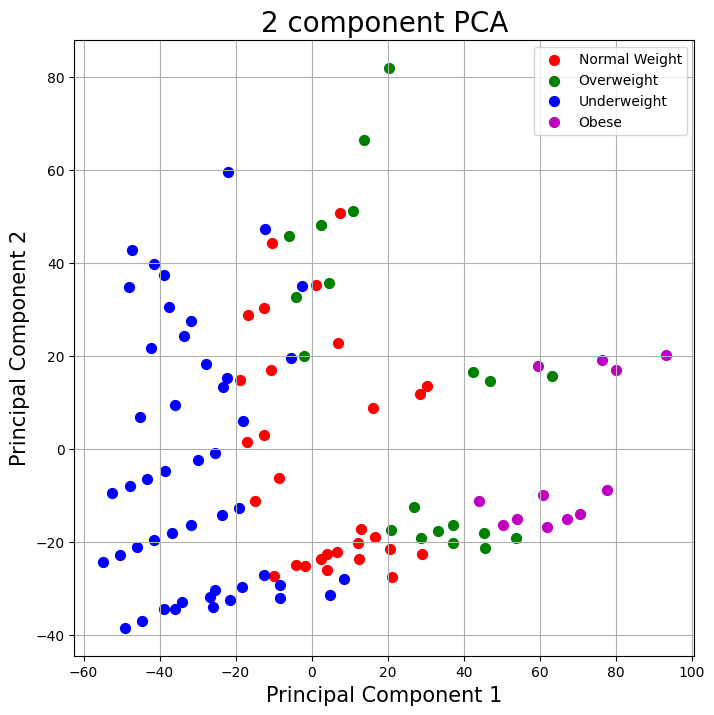

In [102]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Normal Weight', 'Overweight', 'Underweight', 'Obese']
colors = ['r', 'g', 'b' , 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**We conclude that this data is non-linear data so we could use any linear model, so the optimal machine learning model is DECISION TREE for example or large multi preceptron ml model**

         Age  Gender  Height  Weight   BMI  Label
Age     1.00   -0.09   -0.08    0.47  0.47  -0.13
Gender -0.09    1.00    0.88    0.42  0.34  -0.28
Height -0.08    0.88    1.00    0.43  0.35  -0.24
Weight  0.47    0.42    0.43    1.00  0.97  -0.57
BMI     0.47    0.34    0.35    0.97  1.00  -0.59
Label  -0.13   -0.28   -0.24   -0.57 -0.59   1.00


<Axes: >

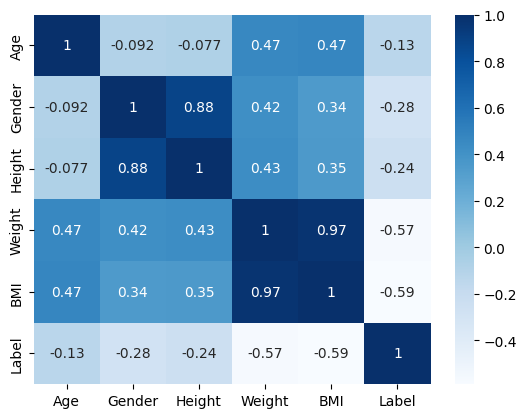

In [103]:
df['Label'] = LabelEncoder().fit_transform(df['Label'])
df_corr_heatmap=sns.heatmap(df.corr(),cmap='Blues' ,annot=True)
print(df.corr())
df_corr_heatmap

## ***preprocess the data to help the ML model react with data.***

In [104]:
X = StandardScaler().fit_transform(X)
X.shape , y.shape

((108, 5), (108,))

**split data to train and test**

**Use train_test_split**

In [105]:
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size= 0.25)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((81, 5), (27, 5), (81,), (27,))

## ***Now We use LazyClassifier***

In [106]:
classifiers = LazyClassifier(verbose = 0)
models , predictions = classifiers.fit(X_train=X_train , X_test=X_test, y_train= y_train , y_test = y_test)
models

 76%|███████▌  | 22/29 [00:00<00:00, 33.94it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 5
[LightGBM] [Info] Start training from score -1.504077
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -1.561236
[LightGBM] [Info] Start training from score -0.783531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

100%|██████████| 29/29 [00:00<00:00, 29.62it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,None,1.00,0.22
DecisionTreeClassifier,1.00,1.00,None,1.00,0.01
ExtraTreesClassifier,1.00,1.00,None,1.00,0.13
BaggingClassifier,1.00,1.00,None,1.00,0.03
RandomForestClassifier,0.96,0.98,None,0.96,0.15
LinearSVC,0.93,0.95,None,0.93,0.01
ExtraTreeClassifier,0.89,0.93,None,0.90,0.01
LabelSpreading,0.85,0.91,None,0.85,0.01
LabelPropagation,0.85,0.91,None,0.85,0.01


***As we can see that Decision-Tree model is the best model used to predict labels as it has the least time taken with perfect metrics values***

In [107]:
models.loc['DecisionTreeClassifier']

Accuracy             1.00
Balanced Accuracy    1.00
ROC AUC              None
F1 Score             1.00
Time Taken           0.01
Name: DecisionTreeClassifier, dtype: object

In [ ]:
classifiers = LazyClassifier(verbose = 0)
models , predictions = classifiers.fit(X_train=X_train , X_test=X_test, y_train= y_train , y_test = y_test)
models